In [1]:
%matplotlib inline  

In [2]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
pd.set_option('display.max_columns', 50) # print all rows


import os
os.chdir('/Users/evanbiederstedt/Downloads/RRBS_data_files')

In [3]:
"""
Meth_PDR_cell_CLL_RRBS_trito_pool_filteredGpC_less3.8.csv
Meth_PDR_cell_CLL_RRBS_cw154_filteredGpC_less3.8.csv
Meth_PDR_cell_RRBS_normal_B1_filteredGpC_less3.8.csv
Meth_PDR_cell_normalmcell_filteredGpC_less3.8.csv
Meth_PDR_cell_normalpcell_filteredGpC_less3.8.csv
"""

'\nMeth_PDR_cell_CLL_RRBS_trito_pool_filteredGpC_less3.8.csv\nMeth_PDR_cell_CLL_RRBS_cw154_filteredGpC_less3.8.csv\nMeth_PDR_cell_RRBS_normal_B1_filteredGpC_less3.8.csv\nMeth_PDR_cell_normalmcell_filteredGpC_less3.8.csv\nMeth_PDR_cell_normalpcell_filteredGpC_less3.8.csv\n'

In [4]:
normal_cellA_df = pd.read_csv("Meth_PDR_cell_RRBS_normal_B1_filteredGpC_less3.8.csv")    # these are the 'weighted' results
normal_cellB_df = pd.read_csv("Meth_PDR_cell_normalpcell_filteredGpC_less3.8.csv")
normal_cellC_df = pd.read_csv("Meth_PDR_cell_normalmcell_filteredGpC_less3.8.csv")
cll_cellA_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_cw154_filteredGpC_less3.8.csv")
cll_cellC_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_trito_pool_filteredGpC_less3.8.csv")

In [5]:
print(normal_cellA_df.shape)
print(normal_cellB_df.shape)
print(normal_cellC_df.shape)
print(cll_cellA_df.shape)
print(cll_cellC_df.shape)

(126, 7)
(91, 7)
(88, 7)
(66, 7)
(44, 7)


In [6]:
frames1 = [normal_cellA_df, normal_cellB_df, normal_cellC_df]

normal_result = pd.concat(frames1)

In [7]:
normal_result["type"] = str('normal')

In [8]:
normal_result = normal_result.reset_index(drop=True)

In [9]:
cll_cellA_df = cll_cellA_df.drop(["Unnamed: 0"], axis=1)  
cll_cellC_df = cll_cellC_df.drop(["Unnamed: 0"], axis=1)  

In [10]:
frames2 = [cll_cellA_df, cll_cellC_df]

cll_result = pd.concat(frames2)

In [11]:
cll_result.shape

(110, 6)

In [12]:
cll_result["type"] = str('CLL')

In [13]:
cll_result = cll_result.reset_index(drop=True)

In [14]:
print(normal_result.shape)
print(cll_result.shape)

(305, 8)
(110, 7)


In [15]:
combined = normal_result.append(cll_result)

In [16]:
combined.head()

,PDR_total,Unnamed: 0,filename,methylation,mixedReadCount,thisMeth,total_reads,type
0,0.294004,0.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACAACC,0.526671,2761820.0,4947445.0,9393810.0,normal
1,0.438181,1.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACCGCG,0.492195,1284661.0,1443019.0,2931805.0,normal
2,0.315044,2.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACGTGG,0.519575,2580776.0,4256257.0,8191800.0,normal
3,0.358116,3.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.ACTCAC,0.598112,3338.0,5575.0,9321.0,normal
4,0.284849,4.0,RRBS_normal_B_cell_A1_24_TAAGGCGA.AGGATG,0.562507,4876929.0,9630732.0,17121087.0,normal


In [17]:
combined.shape

(415, 8)

In [18]:
# Remove all data points with less than 100k in totcpg 
combined = combined[combined['total_reads'] > 100000]

In [19]:
combined.shape  # removed 56 files

(359, 8)

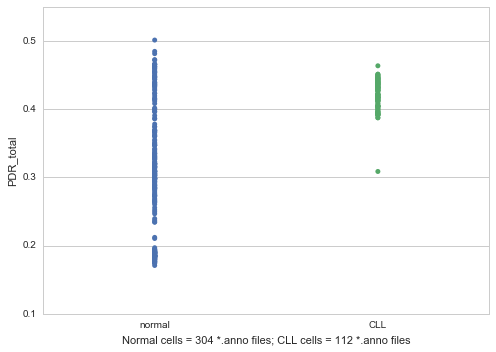

In [20]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined["type"], y=combined["PDR_total"])
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.xlabel("Normal cells = 304 *.anno files; CLL cells = 112 *.anno files")


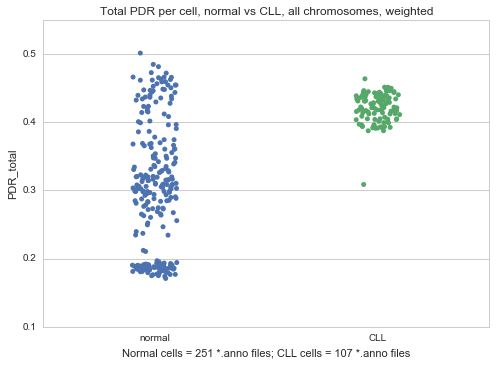

In [21]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined["type"], y=combined["PDR_total"], jitter=True)
sns.plt.title("Total PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")

In [22]:
# find out identity of CLL outlier


cll_result = cll_result[cll_result['total_reads'] > 100000]
PDRlessthan30 = cll_result[cll_result["PDR_total"]<0.30]

In [23]:
PDRlessthan30  # Ask Dan about this
# Possibly "you are sampling random chromosomes, please avoid 13, which has a deletion in cw154"

,filename,methylation,PDR_total,thisMeth,mixedReadCount,total_reads,type


violin plot features a kernel density estimation of the underlying distribution


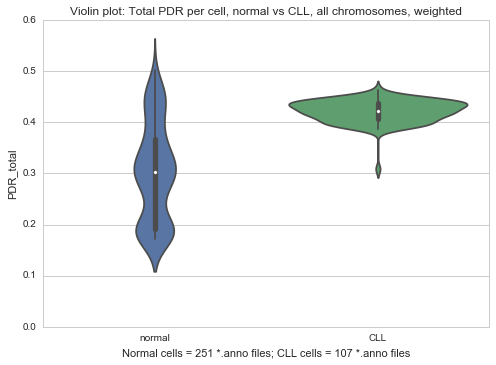

In [24]:
ax = sns.violinplot(x=combined["type"], y=combined["PDR_total"])
sns.plt.title("Violin plot: Total PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
print("violin plot features a kernel density estimation of the underlying distribution")

Box whisker plot


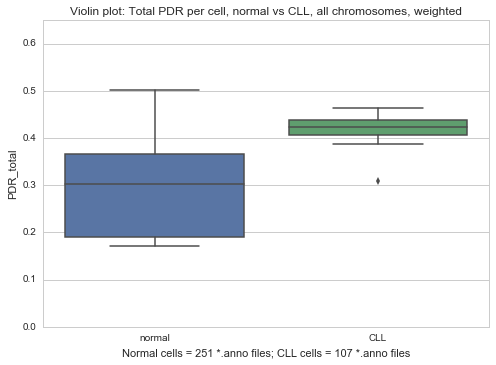

In [25]:
ax = sns.boxplot(x=combined["type"], y=combined["PDR_total"], linewidth=1.5)
plt.ylim(0.0, 0.65)
sns.plt.title("Violin plot: Total PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
print("Box whisker plot")


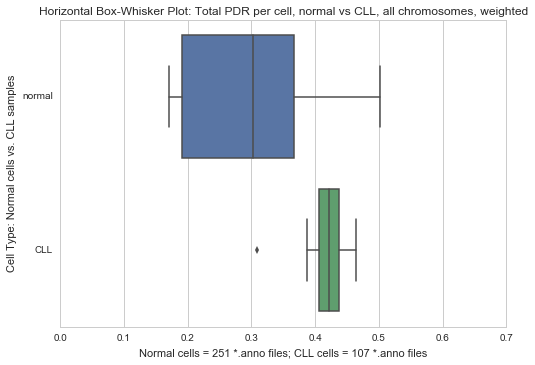

In [26]:
ax = sns.boxplot(y=combined["type"], x=combined["PDR_total"], linewidth=1.5)
sns.plt.title("Horizontal Box-Whisker Plot: Total PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.xlim(0.0, 0.70)
plt.ylabel("Cell Type: Normal cells vs. CLL samples")

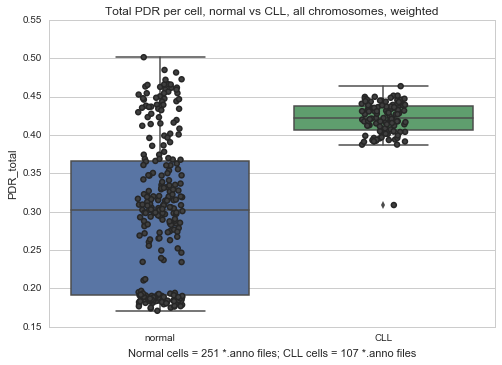

In [27]:
ax = sns.boxplot(x=combined["type"], y=combined["PDR_total"], linewidth=1.5)
ax = sns.stripplot(x=combined["type"], y=combined["PDR_total"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Total PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")



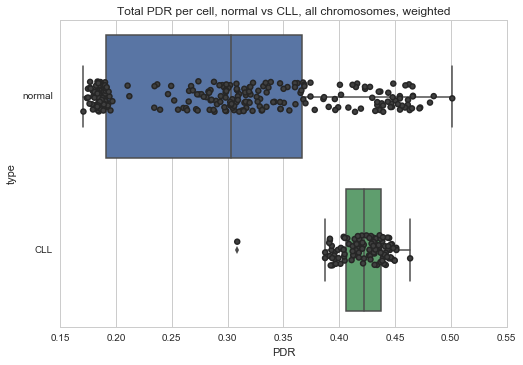

In [28]:
ax = sns.boxplot(y=combined["type"], x=combined["PDR_total"], linewidth=1.5)
ax = sns.stripplot(y=combined["type"], x=combined["PDR_total"], color=".25", linewidth=1.5, jitter=True)
sns.plt.title("Total PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.xlabel("PDR")

Swarmplot == categorical scatterplot where the points do not overlap


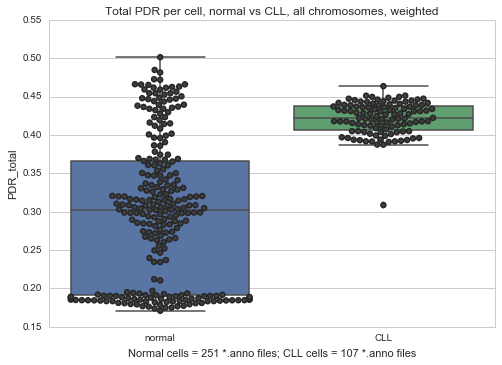

In [29]:
ax = sns.boxplot(x=combined["type"], y=combined["PDR_total"], linewidth=1.5)
ax = sns.swarmplot(x=combined["type"], y=combined["PDR_total"], color=".25", linewidth=1.5)
sns.plt.title("Total PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
print("Swarmplot == categorical scatterplot where the points do not overlap")


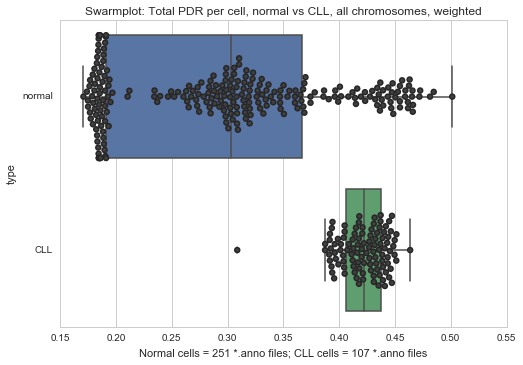

In [30]:
ax = sns.boxplot(y=combined["type"], x=combined["PDR_total"], linewidth=1.5)
ax = sns.swarmplot(y=combined["type"], x=combined["PDR_total"], color=".25", linewidth=1.5)
sns.plt.title("Swarmplot: Total PDR per cell, normal vs CLL, all chromosomes, weighted")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")

In [31]:
normal_cellA_df = pd.read_csv("Meth_PDR_cell_RRBS_normal_B1_ALL.csv")    # these are the 'weighted' results
normal_cellB_df = pd.read_csv("Meth_PDR_cell_normalpcell_ALL.csv")
normal_cellC_df = pd.read_csv("Meth_PDR_cell_normalmcell_ALL.csv")
cll_cellA_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_cw154_ALL.csv")
cll_cellC_df = pd.read_csv("Meth_PDR_cell_CLL_RRBS_trito_pool_C_ALL.csv")

In [32]:
normal_cellA_df = normal_cellA_df.drop(["Unnamed: 0"], axis=1)  
normal_cellA_df["type"] = str('normal')
normal_cellA_df["bio"] = str('normal_B')
normal_cellA_df["protocol"] = normal_cellA_df["filename"].str[5:24]
normal_cellB_df = normal_cellB_df.drop(["Unnamed: 0"], axis=1)  
normal_cellB_df["type"] = str('normal')
normal_cellB_df["bio"] = str('CD27p')
normal_cellB_df["protocol"] = normal_cellB_df["filename"].str[5:31]
normal_cellC_df = normal_cellC_df.drop(["Unnamed: 0"], axis=1)  
normal_cellC_df["type"] = str('normal')
normal_cellC_df["bio"] = str('CD27m')
normal_cellC_df["protocol"] = normal_cellC_df["filename"].str[5:31]

In [33]:
frames3 = [normal_cellA_df, normal_cellB_df, normal_cellC_df]
normal_result = pd.concat(frames3)
normal_result = normal_result[['filename', 'PDR_total', 'total_reads', 'type', 'bio', 'protocol']]

In [34]:
cll_cellA_df = cll_cellA_df.drop(["Unnamed: 0"], axis=1) 
cll_cellA_df["type"] = str('CLL')
cll_cellA_df["bio"] = str('CLL')
cll_cellA_df["protocol"] = cll_cellA_df["filename"].str[5:34]
cll_cellA_df["protocol"][cll_cellA_df["protocol"] == 'cw154_CutSmart_proteinase_K_T'] = 'cw154_CutSmart_proteinase_K'
cll_cellA_df["protocol"][cll_cellA_df["protocol"] == 'cw154_Tris_protease_GR_CAGAGA'] = 'cw154_Tris_protease_GR'
cll_cellA_df["protocol"][(cll_cellA_df["protocol"] != 'cw154_Tris_protease_GR') & (cll_cellA_df["protocol"] != 'cw154_CutSmart_proteinase_K')] = 'cw154_Tris_protease'
cll_cellC_df = cll_cellC_df.drop(["Unnamed: 0"], axis=1) 
cll_cellC_df["type"] = str('CLL')
cll_cellC_df["bio"] = str('CLL')
cll_cellC_df["protocol"] = cll_cellC_df["filename"].str[5:17]
frames2 = [cll_cellA_df, cll_cellC_df]
cll_result = pd.concat(frames2)
cll_result = cll_result[['filename', 'PDR_total', 'total_reads', 'type', 'bio', 'protocol']]
cll_result = cll_result.reset_index(drop=True)
normal_result = normal_result.reset_index(drop=True)
combined2 = normal_result.append(cll_result)
combined2 = combined2.reset_index(drop=True)
print(combined2.shape)

(414, 6)


/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/local/Library/Frameworks/Python.framework/Versions/3.4/lib/python3.4/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [35]:
# Remove all data points with less than 100k in totcpg 
combined2 = combined2[combined2['total_reads'] > 100000]

In [36]:
print(combined2.shape)

(358, 6)


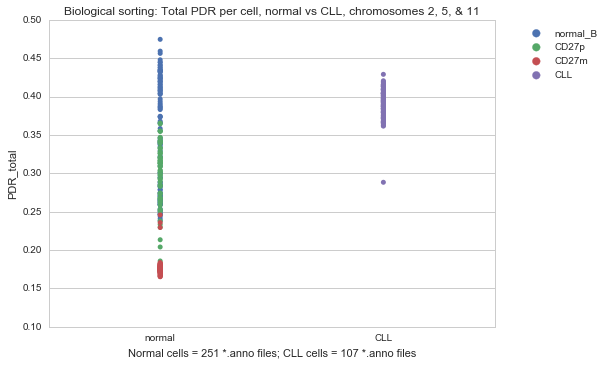

In [37]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["PDR_total"], hue=combined2.bio)
sns.plt.title("Biological sorting: Total PDR per cell, normal vs CLL, chromosomes 2, 5, & 11")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

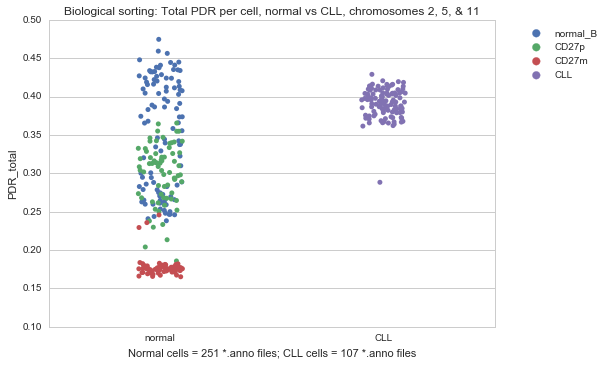

In [38]:
import seaborn as sns
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["PDR_total"], hue=combined2.bio, jitter=True)
sns.plt.title("Biological sorting: Total PDR per cell, normal vs CLL, chromosomes 2, 5, & 11")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

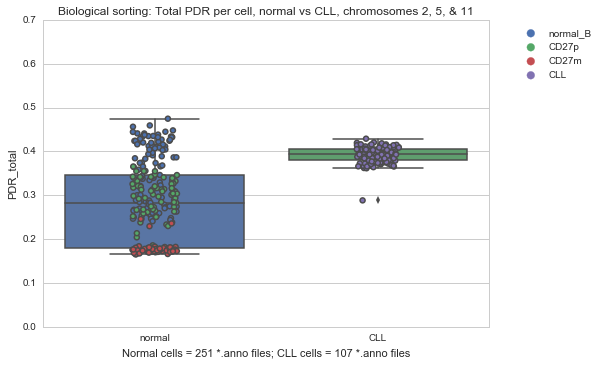

In [39]:
ax = sns.boxplot(x=combined2["type"], y=combined2["PDR_total"], linewidth=1.5)
plt.ylim(0,0.7)
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["PDR_total"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Total PDR per cell, normal vs CLL, chromosomes 2, 5, & 11")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

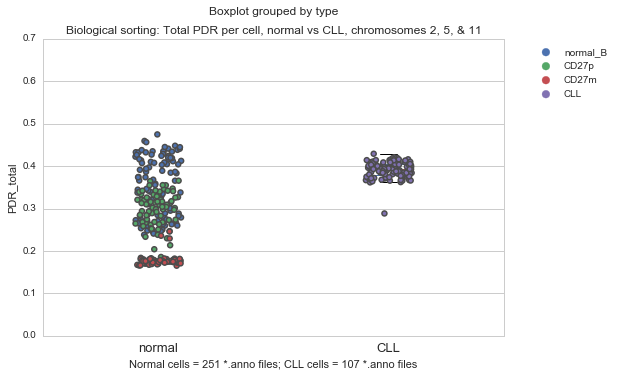

In [40]:
combined2.boxplot(column = 'PDR_total', by='type', fontsize=13)
plt.ylim(0,0.7)
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["PDR_total"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Total PDR per cell, normal vs CLL, chromosomes 2, 5, & 11")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

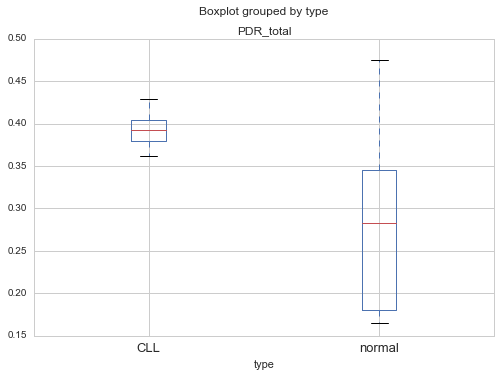

In [41]:
combined2.boxplot(column = 'PDR_total', by='type', fontsize=13)

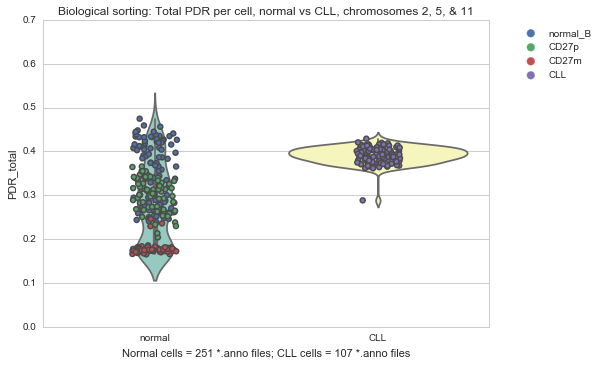

In [42]:
ax = sns.violinplot(x=combined2["type"], y=combined2["PDR_total"], palette="Set3")
plt.ylim(0,0.7)
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["PDR_total"], hue=combined2.bio, jitter=True, linewidth=1.5)
sns.plt.title("Biological sorting: Total PDR per cell, normal vs CLL, chromosomes 2, 5, & 11")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

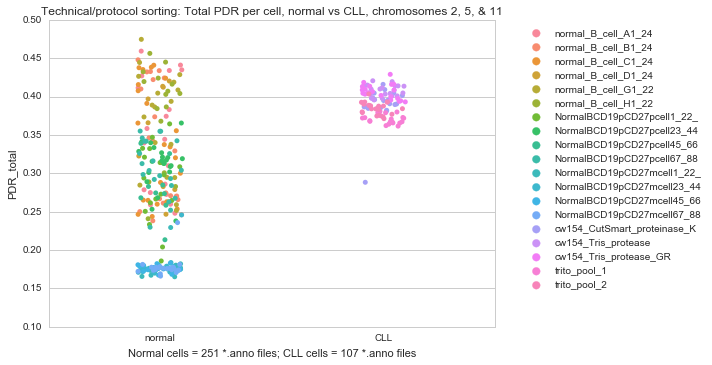

In [43]:
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["PDR_total"], hue=combined2.protocol, jitter=True)
sns.plt.title("Technical/protocol sorting: Total PDR per cell, normal vs CLL, chromosomes 2, 5, & 11")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

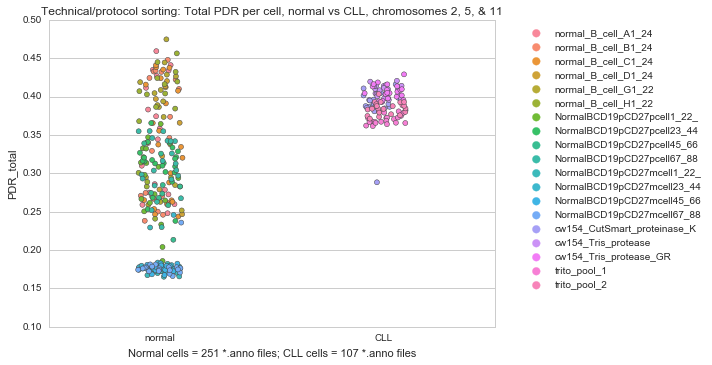

In [44]:
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["PDR_total"], hue=combined2.protocol, jitter=True, linewidth=0.5)
sns.plt.title("Technical/protocol sorting: Total PDR per cell, normal vs CLL, chromosomes 2, 5, & 11")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)

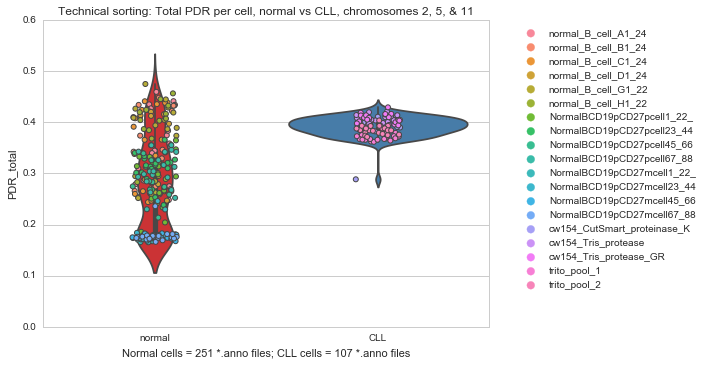

In [45]:
ax = sns.violinplot(x=combined2["type"], y=combined2["PDR_total"], palette="Set1")
sns.set_style("whitegrid")
ax = sns.stripplot(x=combined2["type"], y=combined2["PDR_total"], hue=combined2.protocol, jitter=True, linewidth=1.0)
sns.plt.title("Technical sorting: Total PDR per cell, normal vs CLL, chromosomes 2, 5, & 11")
plt.xlabel("Normal cells = 251 *.anno files; CLL cells = 107 *.anno files")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)